In [21]:
# Other tools
import pandas as pd
import numpy as np
import time

# Normalizing Everything with the Standard Scalar
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

# Keras/Sklearn Tools
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# For Results
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Plotting
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
def plot_roc(labels, prediction_scores):
    '''
    Creates a plot of the Recieving Opering Characteristics (ROC) Curve
    using the labels and predictions generated by the classifier.
    AOC is the Area under the curve.
    '''
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.figure(figsize = (12,8))
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC for Model Performance')
    plt.tight_layout()
    plt.show()

In [23]:
# Reading and prepping the data
df = pd.read_csv('HR_comma_sep.csv') # - 15k entries

# Getting Dummies and combining frames
sales = pd.get_dummies(df['sales'], prefix='sales')
salary = pd.get_dummies(df['salary'], prefix='salary')

frames = [df, sales, salary]

# Converting Sales and Salary to Numerical Values 
result = pd.concat(frames, axis=1, sort=False)

In [24]:
# Splitting into X and y
X = result[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales_hr', 'sales_management', 
               'sales_marketing', 'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical', 'salary_high', 'salary_low', 'salary_medium']]
y = result['left']

# Normalizing the average monthly hours
ss = StandardScaler()

X['average_montly_hours'] = ss.fit_transform(X[['average_montly_hours']])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
# Building the model
model = Sequential()
model.add(Dense(32, input_shape=(16,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(4, activation='elu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
# Measuring the fit time for 10 epochs
start = time.time()

model.fit(X_train, y_train, epochs=10, verbose=0, validation_split=.3) 

end = time.time()
print ("Time elapsed:", end - start)

Time elapsed: 3.8126955032348633


In [27]:
# Predicting
y_pred = model.predict_classes(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2853
           1       0.85      0.78      0.81       897

    accuracy                           0.92      3750
   macro avg       0.89      0.87      0.88      3750
weighted avg       0.91      0.92      0.91      3750




The grey line represents a random guess.


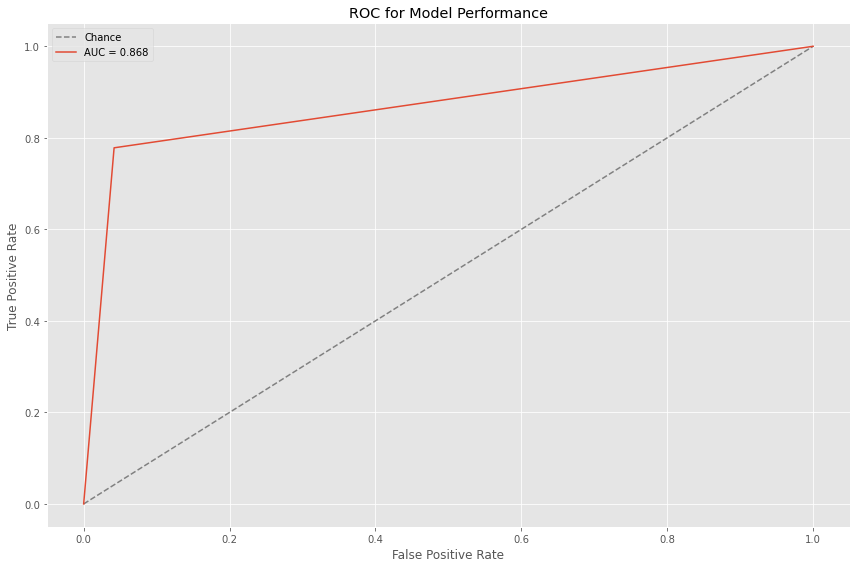

In [28]:
print("\nThe grey line represents a random guess.")
plot_roc(y_test,y_pred)